## Use Case: Assessing the impact of volcanic eruptions on the upper atmosphere in the 20th century

## Quality assessment question: How well does reanalysis represent the footprint of major volcanic eruptions in the vertical structure of the atmosphere? 

## Quality assessment statement

* ERA5 provides physically consistent information on the expected impact of major volcanic eruptions on the climate system, both in the stratosphere and in the troposphere.
* Prior to 1979, and in particular during the first two decades of ERA5 from 1940 to 1960, the main mechanisms of stratospheric variability is not consistent with the expected behavior of the quasi-biennial oscillation. Data from the higher stratosphere during the initial years of the reanalysis should be handled carefully.
* ERA5 is punctuated by discontinuities in the upper stratosphere, due to the introduction of different satellite observations.
* After 2006, with the introduction of radio occultation data, discontinuities in the upper stratosphere are reduced significantly 

## Introduction

The reanalysis ERA5 is a comprehensive representation of the atmospheric state on a regular grid, reconstructed using a wide range of in-situ and satellite data. Unlike previous ECMWF reanalyses (ERA, ERA-40, ERA-Interim), ERA5 extends further back to 1940, well before the availability of satellite observations that offer essential information on the three-dimensional structure of the atmosphere after 1979.

This notebook presents an overview of ERA5's long-term consistency by examining the average vertical structure of key atmospheric parameters and their correlation with major volcanic eruptions (Fujiwara et al., 2015).

For example, the figure illustrates the impact of the Pinatubo eruption in 1991 on temperature, particularly showcasing the subsequent warming of the lower stratosphere.

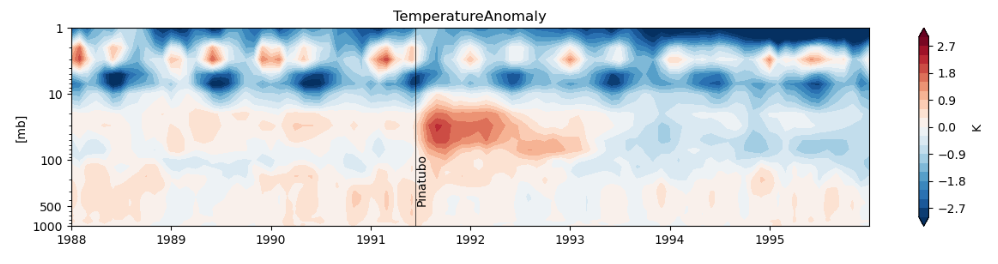png)

## Method

1. Download the ERA5 monthly temperature, U component of wind, vertical velocity, ozone mass mixing ratio, relative humidity and cloud cover for the period 1940 - to present on all pressure levels available.
2. Calculate the spatial weighted mean of each variable. 
3. Calculate the difference between the monthly vertical profiles of each variable and the corresponding monthly climatology.
4. Display Hoevmoeller diagrams of each variable as a function in time vs pressure, emphasizing the timing of the major volcanic eruptions 2022

## Setup of the analysis and data retrieval

We use only standard libraries for this notebook. In particular `numpy` is necessary to handle the dates of volcanic eruptions.

For this analysis, we use a very basic processing (spatial weighted mean over the entire grid) applied to a comprehensive set of data. In particular, we use:

* the entire time span of ERA5, from 1940 to present;
* 6 variables to summarize key dynamic, thermodynamic and chemical aspects of the state of the atmosphere;
* all 37 pressure levels of ERA5

The main volcanic eruptions of the XX Century with Volcanic Explosivity Index ([VEI](https://www.usgs.gov/observatories/yvo/news/volcanic-explosivity-index-a-tool-comparing-sizes-explosive-volcanic)) larger than 5 are also reported in the analysis. The approximate date of the eruptions and the corresponding VEI are extracted from the catalogue of the [Smithsonian Institution - National Museum of National History](https://volcano.si.edu/). The eruptions of El Chichón and Mount St. Helens occurred in 1980 and 1982 respectively. However, to simplify the visualization, they are both attributed to 1981 in the list below.

**NOTE**: the units of the vertical pressure levels are converted from Pascal (Pa) to hecto-Pascal (hPa), which is equivalent to millibars (mb).

In [1]:
#__________________
# Setup environment
#__________________

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from c3s_eqc_automatic_quality_control import diagnostics, download

#____________________
# Define data request
#____________________

collection_id = "reanalysis-era5-pressure-levels-monthly-means"

start = "1940-01"
stop = None  # None: present

variables = [
    "temperature",
    "u_component_of_wind",
    "vertical_velocity",
    "ozone_mass_mixing_ratio",
    "relative_humidity",
    "fraction_of_cloud_cover", 
]

pressure_levels = ["1","2","3","5","7","10","20","30","50","70","100","125","150","175","200","225","250","300","350","400",
                   "450","500","550","600","650","700","750","775","800","825","850","875","900","925","950","975","1000"]

#_______________
# Retrieve data
#_______________

datasets = []
for variable in variables:
    print(f"Downloading and processing {variable}")
    #Define a general request
    request = {
     "format": "grib",
     "product_type": "monthly_averaged_reanalysis",
     "variable": variable,
     "pressure_level": pressure_levels ,
     "time": "00:00",
    }
    #Update the request dictionary to include all dates between start and stop
    requests = download.update_request_date(request, start=start, stop=stop)
    
    ds = download.download_and_transform(
      collection_id,
      requests,
      transform_func=diagnostics.spatial_weighted_mean,
      chunks={"year": 1}
    )
    datasets.append(ds)
ds_era5 = xr.merge(datasets)

#Convert plev to hPa (mb)
ds_era5["plev"] = ds_era5["plev"]/100
ds_era5["plev"].attrs.update({"long_name": "Level", "units": "hPa"})

# Volcanic eruptioin dates
# Solid line for VEI=6
# Dashed line for VEI=5
eruptions = {
    'eruption1': {
        'volcano': 'Pinatubo',
        'date': np.datetime64('1991-06-15'),
        'linestyle': '-'
    },
    'eruption2': {
        'volcano': 'El Chichón, Mount St. Helens',
        'date': np.datetime64('1981-01-01'),
        'linestyle': '--'  
    },
    'eruption3': {
        'volcano': 'Agung',
        'date': np.datetime64('1963-02-24'),
        'linestyle': '-'
    },
    'eruption4': {
        'volcano': 'Bezymianny',
        'date': np.datetime64('1956-01-01'),
        'linestyle': '--'
    },
    # Add more eruptions as needed
}

100%|██████████| 84/84 [00:07<00:00, 11.96it/s]


100%|██████████| 84/84 [00:07<00:00, 11.44it/s]


100%|██████████| 84/84 [00:07<00:00, 11.97it/s]


100%|██████████| 84/84 [00:09<00:00,  8.85it/s]


100%|██████████| 84/84 [00:08<00:00, 10.43it/s]


100%|██████████| 84/84 [00:07<00:00, 11.29it/s]


## Main results

For all variables, we present the time series of vertical profiles, showing monthly anomalies in comparison to the mean values across the entire ERA5-covered period.

The color ranges are carefully set to emphasize the primary characteristics of long-term variability. We ensure that each variable is depicted with an appropriate vertical scale, effectively highlighting the range where the majority of variability occurs.

To illustrate significant variability in the stratosphere, we employ a logarithmic vertical scale for temperature, U component of the wind, geopotential height, and ozone mixing ratio. Conversely, for vertical velocity, humidity, and cloud fraction, we utilize a linear vertical scale, since the variability is mostly concentrated in the troposphere. The vertical lines represent the timing of significant volcanic eruptions.

The figures show significant aspects of global-scale atmospheric variability and change, while also highlighting the role of volcanic eruptions and some potential artifacts originating from an increasing density of data in the stratosphere during the period 1940 and 1979 and the introductions of satellite observations after 1979.

* Regarding **temperature**, the figures clearly depict long-term tropospheric warming and stratospheric cooling trends associated anthropogenic climate change. The stratospheric warming following the major volcanic eruptions is consistent in magnitude with the results presented by Santer et al. (2004) using direct measurements of the lower stratospheric warming from Microwave Sounding Unit (MSU). The cooling of the stratosphere following the transient warming after the Pinatubo eruption is consistent with the decreased concentration of stratospheric ozone discussed by Thompson and Salomon (2009). The discontinuities in the upper stratosphere are associated to the introduction of different satellite observations in the data assimilation system and have been discussed in details by Bell et al. (2021). Notably, the stabilization of discontinuities after 2006 is related to the assimilation of a large number of radio occultation data in the reanalysis.
* In terms of the **U component of wind**, the variability is predominantly influenced by the quasi-biennial oscillation (QBO) in the stratosphere (Baldwin et al., 2001) with a negligible impact of volcanic eruptions, whereas no significant global-scale pattern is discernible in the troposphere below 100 hPa. During the initial two decades of the reanalysis (1940-1960), the stratospheric variability associated with the QBO is noticeably weaker compared to the subsequent period, consistently with larger spread of the ensemble data assimilation discussed in Bell et al. (2021).
* The effect of volcanic eruptions on **vertical velocity** in the troposphere is negligible. However, the discernible long-term tendency in vertical velocity has been investigated by Qie et al. (2022), who attribute it to the intensified atmospheric deep convection over the tropical western Pacific. Note that a negative anomaly of vertical velocity expressed in $Pa/s$ corresponds to a positive anomaly expressed in $m/s$.
* The figures representing **ozone mixing ratio** demonstrate the depletion of the ozone layer after 1978 and the subsequent gradual recovery in the layer between approximately 70 mb and 30 mb, encompassing the Arctic and Antarctic ozone layers (Solomon et al., 2014).
* **Relative humidity** shows a noticeable reduction in tropospheric water vapor, as discussed by Soden et al. (2002) following the Pinatubo eruption.
* The **fraction of cloud cover** does not show a direct global impact of volcanic eruption.  However, it exhibits a positive trend across a major portion of the troposphere, consistent with the intricate pattern of changes derived from the analysis of raw satellite data (Norris et al., 2016).

t min.:-6.518354496544362  max:10.967979225165436
u min.:-22.99306186281946  max:24.32464887896868
w min.:-0.0011184509135949358  max:0.0011380992283480176
o3 min.:-1.1695428544548408e-06  max:3.048717980874982e-06
r min.:-5.135649935745445  max:6.612420334273148
cc min.:-0.012926627976658916  max:0.011653847781066803


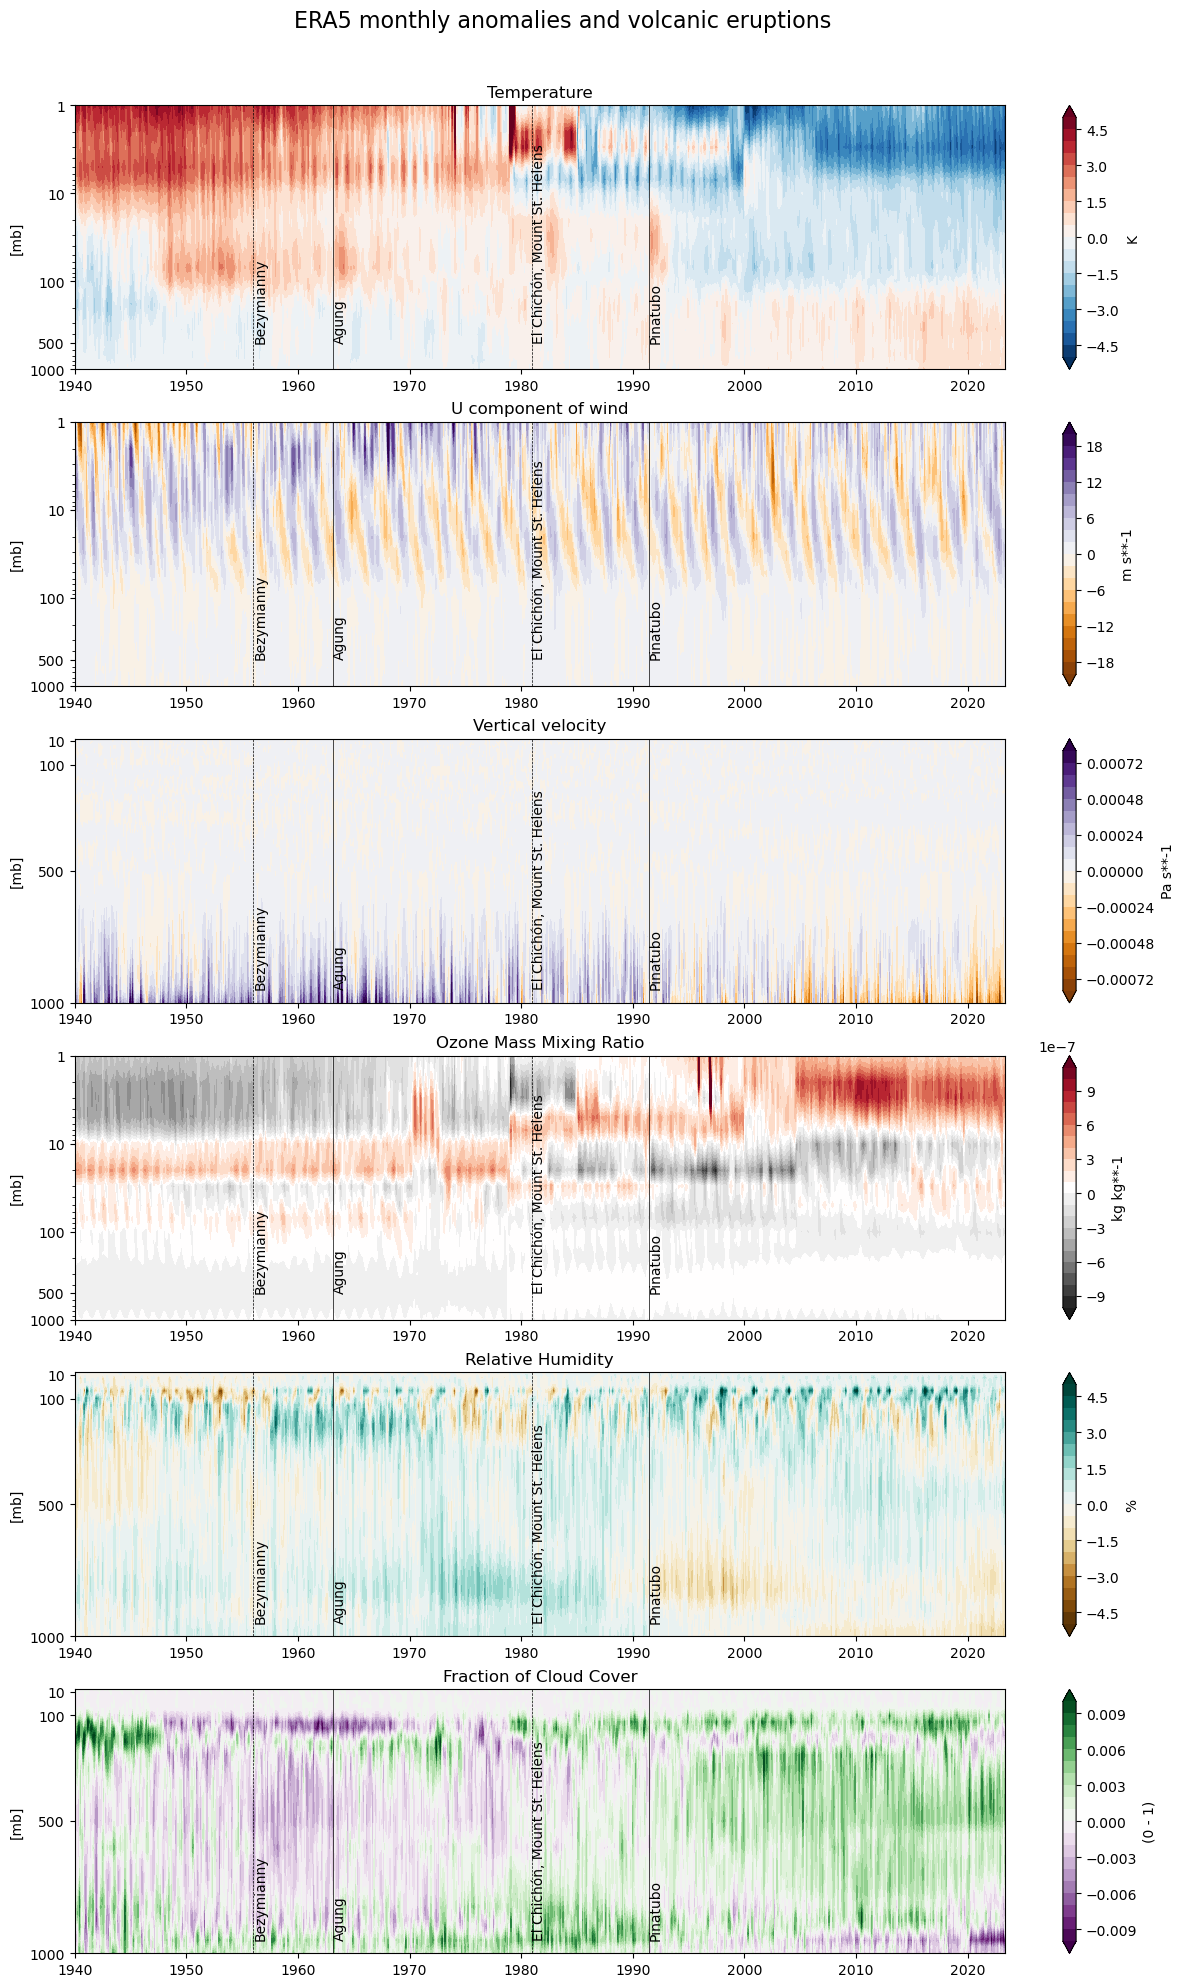

In [2]:
#Compute anomalies
with xr.set_options(keep_attrs=True):
    ds_anoma = ds_era5.groupby("forecast_reference_time.month") - ds_era5.groupby("forecast_reference_time.month").mean("forecast_reference_time")
    for varname in list(ds_anoma.data_vars):
      ds_anoma[varname].attrs["long_name"] = ds_era5[varname].attrs["long_name"] + " anomaly"
      print(f"{varname} min.:{ds_anoma[varname].min().values}  max:{ds_anoma[varname].max().values}")

#Set time interval to display
#xlim=np.array(['1988-01-01','1995-12-31'], dtype='datetime64') # zoom on Pinatubo
#xlim=np.array(['1962-01-01','1967-12-31'], dtype='datetime64') # zoom on Agung
#xlim=np.array(['1980-01-01','1985-12-31'], dtype='datetime64') # zoom on El Chicon
xlim=np.array(['1940-01-01','2022-12-31'], dtype='datetime64') # entire period
        
#Define customized configuration for each variable
toplot = {
    "Temperature" : {
       "vname"   : "t",
       "levels"  : np.arange(-5, 5.5, 0.5),
       "yscale"  : "log",
       "ylim"    : [1000, 1],
       "yticks"  : [1000,500,100,10,1],
       "cmap"    : "RdBu_r"
    },
    "U component of wind" : {
       "vname"   : "u",
       "levels"  : np.arange(-20, 20+2, 2),
       "yscale"  : "log",
       "ylim"    : [1000, 1],
       "yticks"  : [1000,500,100,10,1],
       "cmap"    : "PuOr"
    },
    "Vertical velocity" : {
       "vname"   : "w",
       "levels"  : np.arange(-0.8e-3, 0.8e-3+0.8e-4, 0.8e-4),
       "yscale"  : "linear",
       "ylim"    : [1000, 10],
       "yticks"  : [1000,500,100,10],
       "cmap"    : "PuOr"
    },
    "Ozone Mass Mixing Ratio" : {
       "vname"   : "o3",
       "levels"  : np.arange(-1.0e-6, 1.0e-6+1.0e-7, 1.0e-7),
       "yscale"  : "log",
       "ylim"    : [1000, 1],
       "yticks"  : [1000,500,100,10,1],
       "cmap"    : "RdGy_r"
    },
    "Relative Humidity" : {
       "vname"   : "r",
       "levels"  : np.arange(-5, 5+0.5, 0.5),
       "yscale"  : "linear",
       "ylim"    : [1000, 10],
       "yticks"  : [1000,500,100,10],
       "cmap"    : "BrBG"
    },
    "Fraction of Cloud Cover" : {
       "vname"   : "cc",
       "levels"  : np.arange(-0.01, 0.01+0.001, 0.001),
       "yscale"  : "linear",
       "ylim"    : [1000, 10],
       "yticks"  : [1000,500,100,10],
       "cmap"    : "PRGn"
    },
}

fig, axs = plt.subplots(len(toplot))

for i, (varname,attr) in enumerate(toplot.items()):    
    cf = axs[i].contourf(ds_anoma["forecast_reference_time"],ds_anoma["plev"],
                         ds_anoma[attr["vname"]].transpose("plev","forecast_reference_time"),
                         cmap=attr["cmap"],extend='both',levels=attr["levels"])
    axs[i].set_yscale(attr["yscale"])
    axs[i].set_yticks(attr["yticks"])
    axs[i].set_title(varname)
    axs[i].yaxis.set_major_formatter(ScalarFormatter())
    axs[i].invert_yaxis()
    axs[i].set_ylabel('[mb]')
    axs[i].set_xlabel("")
    fig.colorbar(cf, ax=axs[i], label=ds_anoma[attr["vname"]].attrs["units"]) 
    # Add volcanic eruptions
    for eruption_name, eruption in eruptions.items():   
        eruption_date = eruption['date']
        linestyle = eruption['linestyle']
        volcano_name = eruption['volcano']
        if eruption_date >= xlim[0] and eruption_date <= xlim[1]:
           axs[i].axvline(eruption_date, color='black', linestyle=linestyle, lw=0.5)
           axs[i].text(eruption_date, 1000. - 500./(attr['ylim'][1]), volcano_name, rotation='vertical', ha='left', va='bottom')
       
fig.suptitle('ERA5 monthly anomalies and volcanic eruptions', fontsize=16, x=0.45, y=0.92)    
fig.set_size_inches(15,24)

# References

Baldwin, M. P., Gray, L. J., Dunkerton, T. J., Hamilton, K., Haynes, P. H., Randel, W. J., ... & Takahashi, M. (2001). The quasi‐biennial oscillation. Reviews of Geophysics, 39(2), 179-229.

Bell, B., Hersbach, H., Simmons, A., Berrisford, P., Dahlgren, P., Horányi, A., ... & Thépaut, J. N. (2021). The ERA5 global reanalysis: Preliminary extension to 1950. Quarterly Journal of the Royal Meteorological Society, 147(741), 4186-4227.

Fujiwara, M., Hibino, T., Mehta, S. K., Gray, L., Mitchell, D., & Anstey, J. (2015). Global temperature response to the major volcanic eruptions in multiple reanalysis data sets. Atmospheric chemistry and physics, 15(23), 13507-13518.

Norris, J. R., Allen, R. J., Evan, A. T., Zelinka, M. D., O’Dell, C. W., & Klein, S. A. (2016). Evidence for climate change in the satellite cloud record. Nature, 536(7614), 72-75.

Qie, K., Wang, W., Tian, W., Huang, R., Xu, M., Wang, T., & Peng, Y. (2022). Enhanced upward motion through the troposphere over the tropical western Pacific and its implications for the transport of trace gases from the troposphere to the stratosphere. Atmospheric Chemistry and Physics, 22(7), 4393-4411.

Soden, B. J., Wetherald, R. T., Stenchikov, G. L., & Robock, A. (2002). Global cooling after the eruption of Mount Pinatubo: A test of climate feedback by water vapor. science, 296(5568), 727-730.

Santer, B.D.,Wigley, T.M.L., Simmons, A.J., Kållberg, P.W., Kelly, G.A., Uppala, S.M., Ammann, C., Boyle, J.S., Brüggemann, W., Doutriaux, C., Fiorino, M., Mears, C., Meehl, G.A., Sausen, R., Taylor, K.E., Washington, W.M., Wehner, M.F., and Wentz, F.J., 2004: Identification of anthropogenic climate change using a second-generation reanalysis. J. Geophys. Res., 109, D21104, doi:10.1029/2004JD005075.

Solomon, S., Haskins, J., Ivy, D. J., & Min, F. (2014). Fundamental differences between Arctic and Antarctic ozone depletion. Proceedings of the National Academy of Sciences, 111(17), 6220-6225.

Thompson, D. W., & Solomon, S. (2009). Understanding recent stratospheric climate change. Journal of Climate, 22(8), 1934-1943.
